# Homework 2: Perceptron, Logistic Regression, Stocashtic Gradient Descent



This assignment is due on Moodle by **11:59pm on Friday Sep 25**. 
Your solutions to theoretical questions should be done in Markdown/MathJax directly below the associated question.
Your solutions to computational questions should include any specified Python code and results 
as well as written commentary on your conclusions.
Remember that you are encouraged to discuss the problems with your instructors and classmates, 
but **you must write all code and solutions on your own**. For a refresher on the course **Collaboration Policy** click [here](https://github.com/BoulderDS/CSCI5622-Machine-Learning/blob/master/info/syllabus.md#collaboration-policy).

**NOTES**: 

- Do **NOT** load or use any Python packages that are not available in Anaconda (Version: 2019.07) with Python 3.7. 
- Some problems with code may be autograded.  If we provide a function API **do not** change it.  If we do not provide a function API then you're free to structure your code however you like. 
- Submit only this Jupyter notebook to Moodle.  Do not compress it using tar, rar, zip, etc. 
- Extra credit questions will not make your homework total scores overflow i.e., not exceed 30% in the final grade. But you can use extra credit in one homework to cover another.

**Acknowledgment** : Chris Ketelsen


**Please put your name and cuidentity username.**

**Name**: Jonathan Bluhm

**Identity Key**: jobl6075

In [17]:
import math
import pickle
import gzip
import numpy as np
import pandas
import matplotlib.pylab as plt
%matplotlib inline

## [40 points] Problem 1 - Perceptron Training

Consider a binary classification problem on the following dataset:

| x1   | x2         | x3      | y| 
|:------:|:------------:| :-----------:|---:|
|0|0|0|-1|
|0|0|1|1|
|0|1|0|1|
|1|0|0|1|
|0|1|1|-1|
|1|1|0|-1|
|1|0|1|-1|
|1|1|1|1|

We are going to experiment with the Perceptron algorithm in this problem.

### Part 1 [5 points]
Complete the `perceptron_train` function and report the results.

In [18]:
# Do not change - unless needed
data = np.array([
    [0, 0, 0, 1, 0, 1, 1, 1],
    [0, 0, 1, 0, 1, 1, 0, 1],
    [0, 1, 0, 0, 1, 0, 1, 1],
    [-1, 1, 1, 1, -1, -1, -1, 1]
])
data = np.transpose(data)
# Initialize the weights and bias (note that we use a non-standard initialization here).
weights = np.array([0, 0.5, 0.5])
bias = 1

In [81]:
def perceptron_train(data, weights, bias):
    """
    apply transformation and update weights and bias
    :type X: array
    :type y: int
    :type weights: array
    :type bias : int
    :rtype: weights, bias, number of mistakes
    """
    mistakes_count = 0
    for row in data:
        X = np.array(row[:3])
        y = row[-1]
        # YOUR CODE HERE
        activation= np.dot(X,weights)+ bias
        if activation > 0:
            if y==-1:
            #misclassified
                mistakes_count= mistakes_count +1
                #update weights
                for i,weight in enumerate(weights):
                    weight = weight + y*X[i]
                    weights[i] = weight
                bias = bias + y
                
        elif activation <= 0:
            if y== 1:
                #misclassified
                mistakes_count= mistakes_count +1
                #update weights
                for i,weight in enumerate(weights):
                    weight = weight + y*X[i]
                    weights[i] = weight
                bias = bias + y
                
                
                 
    return weights, bias, mistakes_count

#### Part 1 A [2.5 points]
Report the weights, bias, and number of mistakes after the first epoch.

In [79]:
### Do not change or remove this code
weights, bias, number_of_mistakes = perceptron_train(data, weights, bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: 0, mistakes: 4


In [9]:
# for grading - ignore

#### Part 1 B [2.5 points]:
Run the perceptron training for 50 more epochs with the updated weights and report the weights, bias and number of mistakes.

In [80]:
epochs = 50
for i in range(epochs):
    perceptron_train(data,weights,bias)
print(f'weights: {weights}, bias: {bias}, mistakes: {number_of_mistakes}')

weights: [ 1.  -0.5  0.5], bias: 0, mistakes: 4


In [ ]:
# for grading - ignore

### Part 2 [5 points] 
Is it possible that your Perceptron classifier would 
ever perfectly classify all training examples after more passes of the Perceptron Algorithm?
Clearly explain your reasoning.

Pretty doubtful as there is not learning rate. if there were we could tell the perceptron to take smaller steps and could perhaps minimize mistakes that way. So I think it is stuck in a local minimum and continuing to run the code just keeps you in the local minimum. However, the data could also not be linearly seperable, which would mean that there will always be mistakes no matter what. 

### Part 3 [5 points] 
Does the Perceptron classifier necessarily make the same number of mistakes after the first epoch if the data is presented in any other randomized order? 
    Explain your reasoning.

The order of data will affect mistakes made. for instance, if a bunch of  mistakes are made initially then the curve could be shifted "farther down" than normal, this would lead to more mistakes when we encounter points that are "higher up". but if  a mix of far down and high up points are received in alternating order, the curve will stay "in the middle" leading to less mistakes overall. 

###  Part 4 [15 Points]:  Perceptron Classifier on random generated data

Update the Perceptron Learning Algorithm to explore the convergence on linearly separable simulated data sets with particular properties. Take a look at the `Perceptron` class below.

In [113]:
class Perceptron:
    """
    Class to fit a perceptron classifier to simulated data
    """

    def __init__(self, n=100, margin=0.1, X=None, y=None, random_state=1241):
        """
        Initializes Perceptron class.  Generates training data and sets parameters. 

        :param n: the number of training examples
        :param margin: the margin between decision boundary and data
        :param random_state: seed for random number generator 
        :param X: Input training features.  Only used for unit testing. 
        :param y: Input training labels.  Only used for unit testing. 
        """
        # initalize random seed
        np.random.seed(random_state)

        # initialize parameters
        self.n, self.M = n, margin

        # generate random simulated data
        self.X_train, self.y_train = self.gen_data()

        # only used for unit tests
        if X is not None and y is not None:
            self.X_train, self.y_train, self.n = X, y, X.shape[0]

        # initialize weights and bias
        self.w = np.array([1.0, 0.0])
        self.b = 0

        # initialize total mistake counter
        self.num_mistakes = 0

    def train(self, max_epochs=100):
        """
        Runs the Perceptron Algorithm until all training data is correctly classified. 

        :param max_epochs: Maximum number of epochs to perform before stopping.
        """
        for i in range(epochs):
            for row,label in zip(self.X_train, self.y_train):
               
                activation = np.dot(row,self.w)+self.b
                if activation > 0:
                    if label==-1:
                    #misclassified
                        self.num_mistakes = self.num_mistakes + 1 
                    #update weights                    
                        for i,weight in enumerate(self.w):
                            weight = weight + label*row[i]
                            self.w[i] = weight
                        self.b = self.b + label
                
                elif activation <= 0:
                    if label== 1:
                    #misclassified
                        self.num_mistakes = self.num_mistakes + 1 
                    #update weights                    
                        for i,weight in enumerate(self.w):
                            weight = weight + label*row[i]
                            self.w[i] = weight
                        self.b = self.b + label       
               
        print(self.num_mistakes)

    def plot_model(self, decision_boundary=False):
        """
        Plots the simulated data.  Plots the learned decision boundary (#TODO) 
        """
        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 8))
        colors = ["steelblue" if yi == -
                  1 else "#a76c6e" for yi in self.y_train]
        ax.scatter(self.X_train[:, 0], self.X_train[:, 1], color=colors, s=75)
        if decision_boundary:
            # YOUR CODE HERE
            #source of code is from solution to in class noteboook about perceptron
            #only slightly changed to get it working in this assignment
            xplot = np.linspace(-1.5, 1.5, 20) # x_1
            w, b = self.w, self.b
            yplot = (-b - w[0] * xplot) / w[1] # TODO x_2
            ax.plot(xplot, yplot, lw=3, color="black")
        ax.grid(alpha=0.25)
        ax.set_xlabel(r"$x_1$", fontsize=16)
        ax.set_ylabel(r"$x_2$", fontsize=16)

    def gen_data(self):
        """
        Generate random linearly separable data with given margin. 
        Note: You should not need to change this function 
        """
        flip = np.random.choice([-1, 1])
        pos_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        pos_x2 = np.random.uniform(
            self.M + flip * 0.1, 1 / np.sqrt(2), int(self.n / 2))
        pos_x2[-1] = self.M + flip * 0.1
        neg_x1 = np.random.uniform(-1 / np.sqrt(2), 1 / np.sqrt(2), int(self.n / 2))
        neg_x2 = np.random.uniform(-1 / np.sqrt(2), -
                                   self.M + flip * 0.1, int(self.n / 2))
        neg_x2[-1] = -self.M + flip * 0.1
        X = np.concatenate((np.column_stack((pos_x1, pos_x2)),
                            np.column_stack((neg_x1, neg_x2))))
        X = np.dot(X, np.array(
            [[np.cos(np.pi / 6), np.sin(np.pi / 6)], [-np.sin(np.pi / 6), np.cos(np.pi / 6)]]))
        y = np.array([+1] * int(self.n / 2) + [-1] * int(self.n / 2))
        rand_order = np.random.choice(
            range(self.n), replace=False, size=self.n)
        return X[rand_order], y[rand_order]

#### Part 4 A [5 points]
The `Perceptron` class above has the capability of generating its own training data with certain properties. Execute the cell below to generate $n=100$ simulated training examples and plot them. Experiment with the `margin` parameter (good values to try are between $0.01$ and $0.4$). Explain what the `margin` parameter is doing.

4


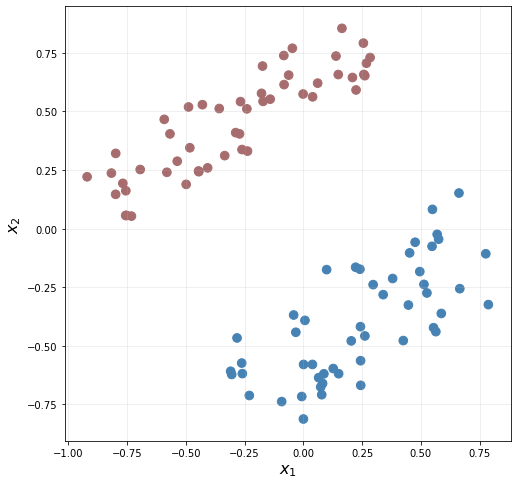

In [119]:
margin = 0.3 # subject to experiment
perc = Perceptron(n=100, margin=margin)
perc.train()
perc.plot_model(decision_boundary=False)

Margin is how big the decision boundary is. A smaller margin leads to more mistakes because the boundary is smaller, so it is easier to mis classify things. A bigger margin puts things farther apart leading to less mistakes. 

#### Part 4 B [5 points] 
Modify the `train` method in the `Perceptron` class to perform the Perceptron Learning Algorithm and learn weights ${\bf w}$ and bias $b$ that perfectly classify the linearly separable training data. Your implementation should:

- Visit all training examples in a random shuffled order over each training epoch.
- Terminate when you finish an epoch without making a single classification error or when you hit the maximum number of epochs.
- Use the `self.num_mistakes` counter to count the total number of classification errors over the entire training process.


Notes:

You should not use Scikit-Learn's Perceptron object in your solution.
It's a good idea to implement a stopping criterion based on the `max_epochs` parameter as the first step. Later we'll look at training sets that will terminate on their own, but implementing a stopping mechanism will save you some pain in the development process.
Do not change the initial guess for the weights and bias. These values were chosen to match the example done in lecture for the unit tests.

In [105]:
from tests import tests
tests.run_test_suite('prob 1.4B', Perceptron)

TestNegMistake (tests.tests.TestPerceptron) ... ok
TestPosMistake (tests.tests.TestPerceptron) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.004s

OK


#### Part 4 C [5 points]
Modify the `plot_model` method so that it plots the learned decision boundary with the training data. Demonstrate that your method is working by training a perceptron with a margin of your choice and displaying the resulting plot. What is the equation of the learned decision boundary? (Use symbols not numbers.)


YOUR ANSWER HERE

8


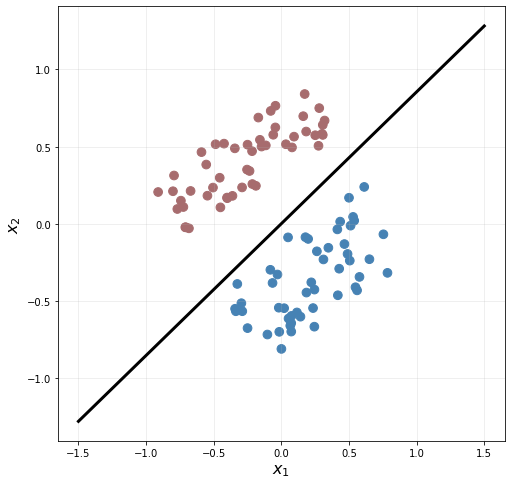

In [114]:
perc = Perceptron(n=100, margin=0.2)
perc.train()
perc.plot_model(decision_boundary=True)

### Part 5 [10 points]

Verify the theorem which states that, if you train a perceptron on linearly separable training data with margin $M > 0$ and each training point satisfies $\|{\bf x}\|_2 \leq 1$ then the Perceptron algorithm will complete after making at most $1/M^2$ classification mistakes.

Do the following to verify the above statement: 
- Train perceptrons with $n = 100$ and different margins ($M=0.3, 0.1, 0.01, 0.001,$ and $0.0001$).
- Produce a log-log plot with $1/M$ on the horizontal axis and the total numbers of mistakes on the vertical axis. 
- On the same set of axes, plot the theoretical upper bound on the number of training mistakes.

Usually we run multiple simulations and get an averaged total number of mistakes for each margin, but it is fine if you only do once.

4
263


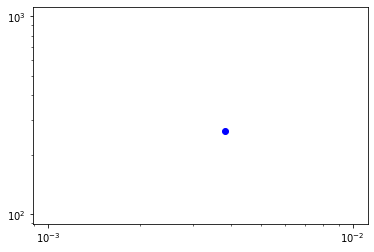

In [127]:
perc1 = Perceptron(n=100, margin=0.3)
perc2 = Perceptron(n=100, margin=0.1)
perc3 = Perceptron(n=100, margin=0.01)
perc4 = Perceptron(n=100, margin=0.001)
perc5 = Perceptron(n=100, margin=0.0001)
perc1.train()
perc5.train()
plt.loglog(1/perc5.num_mistakes, perc5.num_mistakes, color='b', marker='o', linestyle='None')
plt.show()

#### Extra Credit [5 points]

* Explain the limitations of the vanilla perceptron implemented above.
* Provide pseudo code/steps to implement Voting Perceptron or Average Perceptron (see the textbook) and discuss the pros and cons (Compare space complexity)

YOUR ANSWER HERE

## [60 points] Problem 2 : Logistic Regression + SGD

In this Problem, you'll implement a Logistic Regression classifier to predict whether person on the Titanic will survive or not.


Dataset has following attributes:

|Variable|Definition|Key|
|:----:|:----:|:---|
|survival|	Survival|	0 = No, 1 = Yes|
|pclass|	Ticket class|	1 = 1st, 2 = 2nd, 3 = 3rd|
|Age |Age in years	||
|fare	|Passenger fare|	|
|sibsp	|# of siblings / spouses aboard the Titanic| |
|parch	|# of parents / children aboard the Titanic	||
|sex	| Sex|	one hot encoded male, female|
|embarked | Port of Embarkation | one hot encoded C = Cherbourg, Q = Queenstown, S = Southampton|



Following is a class to load the titanic dataset.

In [ ]:
# Make sure you have installed pandas and numpy before you run.
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import exp, log
from collections import defaultdict

class Dataset:
    """
    Class to load dataset containing titanic survival features
    """

    def __init__(self, location, random_state=1241):
        # You shouldn't have to modify this class, but you can if you'd like
        # Load the dataset
        np.random.seed(random_state)
        f = gzip.open(location, 'rb')
        self.train_x, self.train_y, self.test_x, self.test_y = pickle.load(f)
        # appending biases
        self.train_x = np.concatenate((np.ones((self.train_x.shape[0], 1)), self.train_x), axis=1)
        self.test_x = np.concatenate((np.ones((self.test_x.shape[0], 1)), self.test_x), axis=1)
        f.close()
        
    @staticmethod
    def shuffle(X, y):
        """ Shuffle training data """
        shuffled_indices = np.random.permutation(len(y))
        return X[shuffled_indices], y[shuffled_indices]

### Part 1 [5 points]: Implementing sigmoid

#### Part 1 A [4 points] 
First, implement the `sigmoid` function to return the output by applying the sigmoid function $\sigma(z)$ to the input parameter, where the sigmoid function $\sigma(z)$ is defined as:
$$
\sigma(z) = \frac{1}{1+e^{-z}}
$$

In [ ]:
def sigmoid(score, threshold=20.0):
    """
    Sigmoid function with a threshold
    :param score: A real valued number to convert into a number between 0 and 1
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid function result.
    """
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input score (Please do not use external libraries)
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# verify sigmoid implemention w/ scipy;
# note: you should NOT use scipy for your implementation!
from scipy.stats import logistic
assert sigmoid(1) == logistic.cdf(1)
assert sigmoid(5) == logistic.cdf(5)
assert sigmoid(100, threshold=20) == logistic.cdf(20)
assert sigmoid(-1) == logistic.cdf(-1)
assert sigmoid(-5) == logistic.cdf(-5)
assert sigmoid(-100, threshold=20) == logistic.cdf(-20)

#### Part 1 B [1 point]

Next, implement the derivative of the `sigmoid` function, `sigmoid_grad`, i.e. $\frac{\partial\sigma(x)}{\partial x}$.

Hint: your implementation of `sigmoid_grad` should be able to use  your `sigmoid` function to compute the derivative!

In [ ]:
def sigmoid_grad(y, threshold=20.0):
    """
    Derivative/gradient of the sigmoid function.
    :param y: A real valued input for which to compute the derivative.
    :param threshold : Prevent overflow of exp by capping activation at 20.
    return sigmoid derivative function result.
    """
    # TODO: Finish this function to return the output of applying the sigmoid
    # function to the input score (Please do not use external libraries)
    
    # YOUR CODE HERE
    raise NotImplementedError()

In [ ]:
# verify sigmoid_grad using numerical differentiation, i.e: f(x+h)-f(x-h) / 2h
epsilon = 1.0E-8
assert np.isclose(sigmoid_grad(1.0), (sigmoid(1.0 + epsilon) - sigmoid(1.0 - epsilon)) / (2.0*epsilon))
assert np.isclose(sigmoid_grad(0.1), (sigmoid(0.1 + epsilon) - sigmoid(0.1 - epsilon)) / (2.0*epsilon))

### Part 2 [35 points]

#### Part 2 A [15 points]

The negative log likelihood objective is defined as:
$$
\textrm{NLL}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] 
$$

First, write down the derivative of the negative log likelihood objective function, with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for  $n=1$.

YOUR ANSWER HERE

Next, using the `sigmoid` function implemented earlier, finish the `sgd_update` function so that it performs stochastic gradient descent on the single training example and updates the weight vector correspondingly without regularization.

In [ ]:
import math
class LogReg:
    def __init__(self, num_features, eta):
        """
        Create a logistic regression classifier
        :param num_features: The number of features (including bias)
        :param eta: learning rate
        """
        self.w = np.zeros(num_features)
        self.eta = eta

    def progress(self, examples_x, examples_y):
        """
        Given a set of examples, compute the probability and accuracy
        :param examples: The dataset to score
        :return: A tuple of (log probability, accuracy)
        """

        logprob = 0.0
        num_right = 0
        for x_i, y in zip(examples_x, examples_y):
            p = sigmoid(self.w.dot(x_i))
            if y == 1:
                logprob += math.log(p)
            else:
                logprob += math.log(1.0 - p)

            # Get accuracy
            if abs(y - p) <= 0.5:
                num_right += 1

        return logprob, float(num_right) / float(len(examples_y))

    def sgd_update(self, x_i, y, lam = 0.0):
        """
        Compute a stochastic gradient update to improve the log likelihood.
        :param x_i: The features of the example to take the gradient with respect to
        :param y: The target output of the example to take the gradient with respect to
        :param lam : regularization term
        :return: Return the new value of the regression coefficients
        """

        # TODO: Finish this function to do a single stochastic gradient descent update
        
        # YOUR CODE HERE
        raise NotImplementedError()
        return self.w
        

In [ ]:
from tests import tests
tests.run_test_suite('prob 2A', LogReg)

#### Part 2 B [15 points]
Complete the code below to loop over the training data and perform stochastic gradient descent for a pre-defined number of epochs. You do not need to use the parameters lam and decay for this part.

Note: remember to shuffle your training data using `Dataset.shuffle` at the beginning of each epoch.

In [ ]:
def train(epochs, eta, store_epoch, lam=0, decay=0):
    """
    Train a LogReg object for a set number of epochs with a given eta.
    
    Return three lists
    Two lists keep track of training and test accuracy after every store_epoch epochs
    
    The third list keeps track of learning rate after every store_epoch epochs. All values in this list 
    will be the same if decay = 0 (Only required for Part 2F)
    
    With store_epoch = 100, you would store accuracies after epochs = 100, 200....
    
    :param epochs: total number of training epochs
    :param eta: learning rate
    :param store_epoch: store training and test accuracies every print_epoch epochs
    :param lam: weight given to regularization term. 
    :param decay: Used to update learning rate during training (Part 3). 
                  Equals 0 when learning rate is constant throughout training (Part 2). 
    """
    
    dataset_handler = Dataset('./data/titanic.pklz')
    lr = LogReg(dataset_handler.train_x.shape[1], eta)
    assert dataset_handler.train_x.shape == (796,11)
    assert dataset_handler.test_x.shape == (200,11)
    
    train_accuracy_array = []
    test_accuracy_array = []
    learning_rates = []
    for epoch in range(epochs):
        # TODO: Finish the code to loop over the training data and perform a stochastic
        # gradient descent update on each training example.

        # NOTE: It may be helpful to call upon the 'progress' method in the LogReg class
        # to make sure the algorithm is truly learning properly on both training and test data
        
    # YOUR CODE HERE
    raise NotImplementedError()
    return train_accuracy_array, test_accuracy_array, learning_rates

In [ ]:
eta  = 1e-3
epochs = 500
store_epoch = 100

train_acc, test_acc, _ = train(epochs, eta, store_epoch)

for i in range(len(train_acc)):
    print("train accuracy after {} epochs: {}".format((i+1)*store_epoch, train_acc[i]))
    print("test accuracy after {} epochs: {}".format((i+1)*store_epoch, test_acc[i]))
    

#### Part 2 C [5 points]
What is the role of the learning rate? What are the pros and cons of high/low learning rates? Do you see any trade-off? First, plot accuracies of different $\eta$s together vs. number of epochs for both training and testing. Then briefly elaborate on these questions.

In [ ]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}

epochs = 1500
store_epoch = 50
for eta in [1e-3, 1e-4, 1e-5, 1e-6]:
    # TODO: 
    # Finish the code to loop over different values of learning rates (Use the train() function above)
    
    # You need to store accuracy arrays obtained in the dictionaries provided 
    # above (train_results and test_results)
    
    # Effectively, you will be creating a mapping between eta -> train/test_accuracy_array 
    # Therefore, running train_results[eta] should return the train_accuracy_array for that value
    # of eta and likewise for test_results[eta].
    
    # YOUR CODE HERE
    raise NotImplementedError()

Plot training results below.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch, epochs, store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, train_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, train_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, train_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[1e-3], color="steelblue", label=str(1e-3))
ax.plot(epochs_array, test_results[1e-4], color="lightblue", label=str(1e-4))
ax.plot(epochs_array, test_results[1e-5], color="grey", label=str(1e-5))
ax.plot(epochs_array, test_results[1e-6], color="black", label=str(1e-6))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

YOUR ANSWER HERE

#### Part 2 D [10 points]

Adding $l_2$ regularization to the feature parameters for NLL loss gives:

$$
\textrm{NLL}_{l_2}(\boldsymbol{\beta}) = -\displaystyle\sum_{i=1}^n \left[y_i \log \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}) + (1-y_i)\log(1 - \sigma(\boldsymbol{\beta}^T{\bf x}^{(i)}))\right] + \lambda\displaystyle\sum_{k=1}^{p} \beta_{k}^2
$$

where $p$ is the number of features, and $\beta_0$ is the bias term. Notice that $\beta_0$ is not included in the regularization term.

Write down the derivative of the regularized negative log likelihood loss function $\textrm{NLL}_{l_2}$ with respect to $\boldsymbol{\beta}$. Since we are working with SGD, derive it for $n=1$.

YOUR ANSWER HERE

Update your implementation of the `sgd_update` method so that it performs regularized SGD updates of the model parameters to minimize the regularized NLL loss function.

Remember, do **not** regularize the bias parameter $\beta_0$.

Provide train and test accuracy after above change with `lam=1e-5`.

In [ ]:
from tests import tests
tests.run_test_suite('prob 2E', LogReg)

#### Part 2 E [5 points]
Update your implementation of train() to incorporate a regularization term. The change should typically be on only one line in your code.

Plot accuracies of different $\lambda$s together vs. epochs for both training and testing).

In [ ]:
dataset_handler = Dataset('./data/titanic.pklz')
train_results = {}
test_results = {}
epochs = 1500
eta = 1e-5
store_epoch = 50
for lam in [0, 0.01, 0.1, 0.05]:
    
    # TODO: 
    # Finish the code to loop over different values of lambda (Use the train() function above)
    
    # You need to store accuracy arrays obtained in the dictionaries provided 
    # above (train_results and test_results)
    
    # Effectively, you will be creating a mapping between lambda -> train/test_accuracy_array 
    # Therefore, running train_results[lam] should return the train_accuracy_array for that value
    # of lam and likewise for test_results[lam].
    
    # YOUR CODE HERE
    raise NotImplementedError()

Plot training results below.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, train_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, train_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, train_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("train accuracy", fontsize=16)
plt.show()

Plot testing results below.

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(store_epoch,epochs,store_epoch)]
epochs_array.append(epochs)
ax.plot(epochs_array, test_results[0], color="steelblue", label=str(0))
ax.plot(epochs_array, test_results[1e-1], color="black", label=str(1e-1))
ax.plot(epochs_array, test_results[1e-2], color="grey", label=str(1e-2))
ax.plot(epochs_array, test_results[5e-2], color="green", label=str(5e-2))
ax.legend(loc="lower right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("test accuracy", fontsize=16)
plt.show()

**Part 2 F (continued)** What is the effect of regularization term with respect to accuracy? 

YOUR ANSWER HERE

### Part 3 [5 points] 

Time based Learning Rate is dynamic learning rate given the following equation:

$\textrm{LearningRate} = \eta\, / \,(1 + \textrm{decay} \cdot \textrm{current epoch})$

Train SGD with the dynamic learning rate defined above and follow these instructions:
* Use initial learning rate $\eta = 0.1$.
* Use $\textrm{decay} = 0.001$.
* Update learning rate `lr.eta` every epoch.
* Plot train accuracy and learning rate together for each epoch.

The above can be accomplished by changing one line in `train()` from Part 2a. 

In [ ]:
eta  = 1e-1
epochs = 200
store_epoch = 1

# Lists required for plotting
train_accuracy_array = None
learning_rates = None

# YOUR CODE HERE
raise NotImplementedError()

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12,6))
epochs_array = [i for i in range(1,epochs)]
epochs_array.append(epochs)
ax.plot(epochs_array, train_accuracy_array, color="steelblue", label=str('train accuracy'))
ax.plot(epochs_array, learning_rates,color="grey", label=str('learning rate'))
ax.legend(loc="upper right", fontsize=16)
ax.set_xlabel("epochs", fontsize=16)
ax.set_ylabel("", fontsize=16)
plt.show()

### Optional survey.
***

We are always interested in your feedback. At the end of each homework, there is a simple anonymous feedback [survey](https://docs.google.com/forms/d/e/1FAIpQLSfa22OUdAI2LDrK8LA2ldPBEW08-2wM8oVDkeNr528UCijdLA/viewform?usp=pp_url) to solicit your feedback for how to improve the course.